Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [4]:
NAME = "Zander Bonnet"

---

# Homework 7

**Disclaimer:** For this assignment, there are some things that you are asked to do that we have not explicitly done in class. 
For example, you will be asked to modify figures in Matplotlib in new ways. Please use your favorite search engine to look up how to do these things. Realistically, when you use Python in your jobs in the future you will be spending a significant portion of your time to look up new things. And it's never too early to practice that skill. 

## Problem

You can find the data files "Mouse_metadata.csv" and "Study_results.csv" which you will need for this homework on Canvas. You are being asked to create several graphs in this HW. You can find examples of what your graphs are suppose to look like in the additional graph document you can find on Canvas. 

In a pharmaceutical study, 249 mice identified with squamous cell carcinoma (skin cancer) tumor growth were treated with a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The scientists measured the tumor growth over time (volume in $mm^3$) and the number of metastatic sites. The purpose of the study was to compare the performace of the new drug "Capomulin" to several other existing drug regimens. 

Begin by loading the two data sets into Pandas as data frames. 

In [5]:
# YOUR CODE HERE
import pandas as pd
metaFile = "/Users/zanderbonnet/Desktop/Math 167PS/Homework/Data/Mouse_metadata.csv"
metaData = pd.read_csv(metaFile)
print(metaData)


studyFile = "/Users/zanderbonnet/Desktop/Math 167PS/Homework/Data/Study_results.csv"
studyData = pd.read_csv(studyFile)
print(studyData)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       s185    Capomulin  Female           3          17
1       x401    Capomulin  Female          16          15
2       m601    Capomulin    Male          22          17
3       f966    Capomulin    Male          16          17
4       u364    Capomulin    Male          18          17
..       ...          ...     ...         ...         ...
244     q633    Zoniferol    Male          12          25
245     s337    Zoniferol    Male          14          27
246     w140    Zoniferol  Female          19          30
247     w575    Zoniferol  Female          16          28
248     x613    Zoniferol  Female           2          29

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        a203          0           45.000000                 0
1        a203          5           48.508468                 0
2        a203         10           51.852437                 1
3        a203         15    

(a) Describe the two data files. How many rows and columns are in each file? What variables are in the columns? What is in the rows? What is the Pandas index currently used? Do the two files have any common columns?

metaData - This file has 249 rows and 5 colums. The rows are the individual mice. The columns are the mouse id, drug regimine, sex, age in months, and weight. The index is being used as another identifier for the mice.

studyData- This file has 1887 rows and 4 columns. The rows are the individual mice at a time point. The columns arethe mouse id, the timepoint they are being weighed at, the volume of teh tumor, and the metastatic sites. The pandas index does not really tell you much in this case as it is identifying both the mouse id and the time points for each mouse.

The two data sets share the column mouse ID.

(b) Write Pandas code to find the number of male and female mice that were subjected to each drug regimen. Save the results as a Pandas data frame with the names of the drugs as the index and two columns (one for male, one for female). The two columns should contain the counts of individuals subjected to each drug regimen. Display your resulting data frame to the console so that the grader can see it. 

In [6]:
# YOUR CODE HERE
metaData.set_index(['Drug Regimen'], inplace = True)
maleCount = []
femaleCount = []
gen = set(metaData["Sex"])
drugs = set(metaData.index)
for d in drugs:
    for g in gen:
        if g == "Male":
            #break
            maleCount.append(sum(metaData.loc[d]["Sex"] == "Male"))
        elif g == "Female":
            femaleCount.append(sum(metaData.loc[d]["Sex"] == "Female"))
metaData = metaData.reset_index()
new = pd.DataFrame({"Drug Regimen" : list(drugs), "Male Count" : maleCount,  "Female Count": femaleCount})
new = new.set_index(["Drug Regimen"])
print(new)

              Male Count  Female Count
Drug Regimen                          
Ceftamin              12            13
Placebo               12            13
Propriva              13            12
Naftisol              12            13
Ketapril              16             9
Ramicane              16             9
Zoniferol             10            15
Stelasyn               9            15
Capomulin             12            13
Infubinol             13            12


In [11]:
df = metaData.groupby(['Drug Regimen', 'Sex']).size()
df = df.unstack()
df

Sex,Female,Male
Drug Regimen,,
Capomulin,13,12
Ceftamin,13,12
Infubinol,12,13
Ketapril,9,16
Naftisol,13,12
Placebo,13,12
Propriva,12,13
Ramicane,9,16
Stelasyn,15,9


(c) Use Matplotlib to create a side-by-side bar plot that shows the numbers of males and females under each drug regimen. Make sure to label your plot (label the bar groups with the names of the drugs, create a legend, label the y-axis and title your plot). Use different colors for males (blue) and females (red). Look up how to rotate axis lables (to make all the drug names readable). 

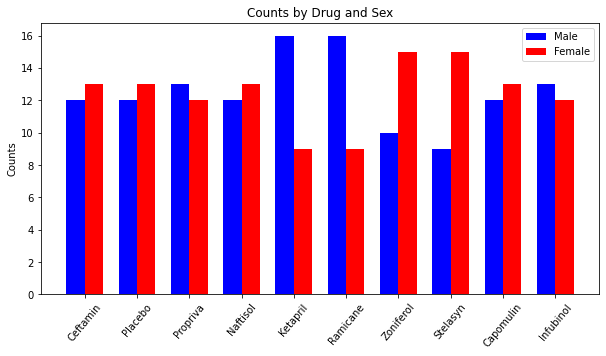

In [27]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

maleData = list(new["Male Count"])
femaleData = list(new["Female Count"])
xPos = np.arange(len(new.index))

plt.bar(xPos, maleData, width  = -.35,  align  = 'edge', color = 'b', label = "Male")
plt.bar(xPos, femaleData,  width = .35, align = 'edge', color = 'r', label = "Female")

plt.ylabel('Counts')
plt.title('Counts by Drug and Sex')
plt.xticks(xPos, list(new.index), rotation = 50)
plt.legend();

(d) Use Pandas to find the average tumor size for each drug regiment, separately at each time-point. Store your results in a Pandas data frame with time point as the index and ten columns (one column per drug regimen). Display your resulting data frame using a print statement. 

**Hint:** Recall, that ```unstack()``` is the opposite of the ```melt()``` procedure. Read up on details in either your text or on the Python documentation website. 

In [5]:
# YOUR CODE HERE
comb = pd.merge(studyData, metaData, on = "Mouse ID")
comb = comb.set_index(['Drug Regimen', 'Timepoint'])

drug = []
time = []
vals = []
for key,val in comb.groupby(level = 0):
    for key2,val2 in comb.groupby(level = 1):
        drug.append(key)
        time.append(key2)
        vals.append(comb.loc[key,key2]["Tumor Volume (mm3)"].mean())

fin = pd.DataFrame({'Drug Regimen':drug, 'Timepoint':time, "Average Tumor Volume": vals})
fin = fin.set_index(['Drug Regimen','Timepoint'])
fin = fin.unstack(level = 0)
print(fin)

             Average Tumor Volume                                              \
Drug Regimen            Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                       
0                       45.000000  45.000000  45.000000  45.000000  45.000000   
5                       44.266086  46.503051  46.541247  47.389175  46.796098   
10                      43.084291  48.285125  49.403909  49.582269  48.694210   
15                      42.064317  50.094055  51.296397  52.399974  50.933018   
20                      40.716325  52.157049  53.197691  54.920935  53.644087   
25                      39.939528  54.287674  55.715252  57.678982  56.731968   
30                      38.769339  56.769517  58.299397  60.994507  59.559509   
35                      37.816839  58.827548  60.742461  63.371686  62.685087   
40                      36.958001  61.467895  63.162824  66.068580  65.600754   
45                      36.2

/var/folders/fc/97_w0wn53dd0skbf332p6dd00000gn/T/ipykernel_79496/3551954187.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  vals.append(comb.loc[key,key2]["Tumor Volume (mm3)"].mean())


In [24]:
combined_data = pd.merge(metaData, studyData, on = "Mouse ID")
combined_data.head()

df2 = combined_data.groupby(['Timepoint', 'Drug Regimen'])['Tumor Volume (mm3)'].mean()
df2 = df2.unstack(-1)
df2

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.235574,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.066132,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.043900,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.264805,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


(e) Use Matplotlib to create a line-graph of the average tumor size as a function of time for each drug regimen. Include all ten drugs in the same plot and use different colors for different drugs. Make sure to label your plot (include x- and y-axis labels, title, legend for which curve belongs to which drug). Please place the legend outside the plot (you should look up how to do this).

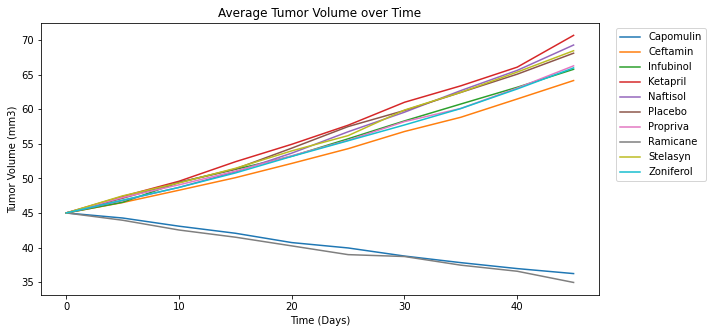

In [6]:
# YOUR CODE HERE
names = fin.columns.get_level_values(1)
for i in names:
    plt.plot(list(fin.index),fin['Average Tumor Volume'][i], label = i)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Time (Days)")
plt.title('Average Tumor Volume over Time')
plt.legend(bbox_to_anchor=(1.2,1), loc="upper right");

(f) Use Pandas to create a Data Frame that has one row per mouse, index values should be Mouse IDs, and has exactly the following columns: "Weight" (initial mouse weight in grams), "Sex", "Age" (of mouse at the beginning of trial in months), "Tumor" (tumor volume on day 45 - include only mice who lived until day 45), "Drug Regimen". Display your resulting data frame using a print statement. 

In [7]:
# YOUR CODE HERE
both = pd.merge(studyData, metaData, on = "Mouse ID")
both = both.set_index(["Timepoint","Mouse ID"])

miceID = list(set(both.loc[45].index))
w = []
s = []
a = []
t = []
treatment = []

for m in miceID:
    w.append(both.loc[45].loc[m]["Weight (g)"])
    s.append(both.loc[45].loc[m]["Sex"])
    a.append(both.loc[45].loc[m]["Age_months"])
    t.append(both.loc[45].loc[m]["Tumor Volume (mm3)"])
    treatment.append(both.loc[45].loc[m]['Drug Regimen'])
    
done = pd.DataFrame({"Mice ID" : miceID, "Weight (g)" : w, "Sex":s, "Age_months":a, "Tumor Volume (mm3) at 45 days" : t})
done = done.set_index("Mice ID")
print(done)

         Weight (g)     Sex  Age_months  Tumor Volume (mm3) at 45 days
Mice ID                                                               
j365             28    Male          24                      64.294085
y865             26    Male          23                      64.729837
n304             26    Male           9                      63.586395
z578             16    Male          11                      30.638696
t198             26    Male          22                      64.911363
...             ...     ...         ...                            ...
x402             28    Male          21                      61.619606
u196             25    Male          18                      40.667713
s508             17    Male           1                      30.276232
g316             22  Female          22                      40.159220
w350             26    Male           7                      64.957562

[130 rows x 4 columns]


In [25]:
df3 = combined_data[combined_data.Timepoint==0]
del df3['Metastatic Sites']
del df3['Timepoint']
del df3['Tumor Volume (mm3)']

final_data = combined_data[combined_data.Timepoint == 45]
final_size = final_data[['Mouse ID', 'Tumor Volume (mm3)']]

df4 = pd.merge(final_size, df3, on = 'Mouse ID')
df4.set_index(['Mouse ID'], inplace = True)
df4 = df4[['Weight (g)', 'Sex', 'Age_months','Tumor Volume (mm3)','Drug Regimen']]
df4

,Weight (g),Sex,Age_months,Tumor Volume (mm3),Drug Regimen
Mouse ID,,,,,
s185,17,Female,3,23.343598,Capomulin
x401,15,Female,16,28.484033,Capomulin
m601,17,Male,22,28.430964,Capomulin
u364,17,Male,18,31.023923,Capomulin
y793,17,Male,17,31.896238,Capomulin
...,...,...,...,...,...
p136,28,Female,5,63.488697,Zoniferol
q511,28,Female,2,68.611061,Zoniferol
q633,25,Male,12,70.827796,Zoniferol


(g) Use Matplotlib to create a scatterplot of final tumor size on day 45 against initial mouse weight for the mice who survived until day 45. Use different colors for different drug treatments. Make sure to label your plot (include x- and y-axis labels, title, and a legend for which color belongs to which drug). Please place the legend outside the plot. 

No handles with labels found to put in legend.


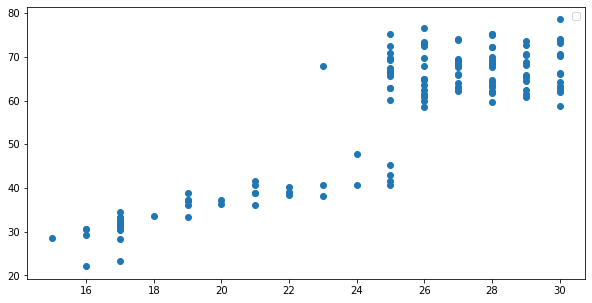

In [8]:
# YOUR CODE HERE
done['Drug Regimen'] = treatment
plt.scatter(list(done["Weight (g)"]),list(done["Tumor Volume (mm3) at 45 days"]))
plt.legend();


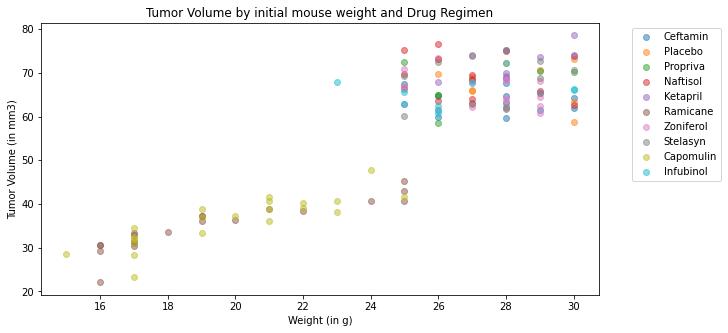

In [28]:
#fig = plt.figure()

for drug in list(set(df4['Drug Regimen'])):
    temp_df = df4[df4['Drug Regimen']== drug]
    plt.scatter(temp_df['Weight (g)'], temp_df['Tumor Volume (mm3)'], alpha=0.5, label = drug)  

plt.ylabel('Tumor Volume (in mm3)')
plt.xlabel('Weight (in g)')
plt.title('Tumor Volume by initial mouse weight and Drug Regimen')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.));

#fig.savefig("HW7_Scatterplot.png", bbox_inches = 'tight'

(h) Comment on what you see in the plot you just created. Do the mice seem to have been randomly assigned to the treatments? 

***Using the Example graph as I did not get the color coding to work***

It appears that the mice were not randomly assigned to the groups. We can see this becasue like colors are grouped close to each other. This makes it seem like groups were assigned by weight.

(i) Create a side-by-side boxplot for initial mouse weight across drug regimens. Order the drugs, so that the boxplots for the drugs "Capomulin" and "Ramicane" appear on the left. 

**Note:** Look at the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) and scroll down to the "Statistics" section to understand how to create a side-by-side boxplot. 

**Hint:** start with a list of lists of values you want to plot. 

In [9]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

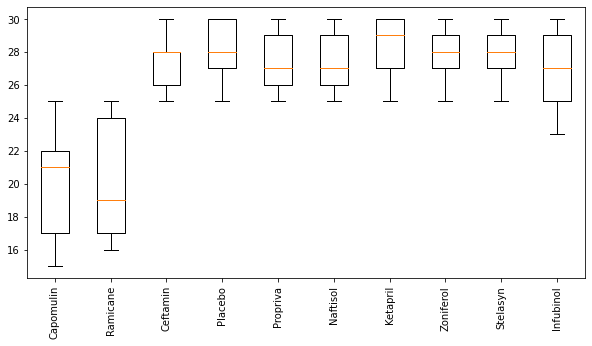

In [35]:
# we want data in form of a list of lists (one list for each drug)! 
# Note, that the lists are not of the same size, so stacking them into one data frame is not a good idea. 

df5 = combined_data[combined_data.Timepoint==0]
#print(df5)
data = []
data.append(list(df5[df5['Drug Regimen']=='Capomulin']['Weight (g)']))
data.append(list(df5[df5['Drug Regimen']=='Ramicane']['Weight (g)']))
#print(data)
for drug in list(set(df5['Drug Regimen'])^{'Capomulin', 'Ramicane'}):
    data.append(list(df5[df5['Drug Regimen']==drug]['Weight (g)']))
#print(list(set(df5['Drug Regimen'])^{'Capomulin', 'Ramicane'}))
#fig = plt.figure()
    
plt.boxplot(data)
plt.xticks(range(1,11), ['Capomulin', 'Ramicane']+list(set(df5['Drug Regimen'])^{'Capomulin', 'Ramicane'}), rotation = 90);

#fig.savefig("HW7_Boxplot.png", bbox_inches = 'tight')